# Project in Data Analysis                                                            
## Dataset "Superstore"

#### Erinda Simo


### Import the required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline

### Loading data

In [32]:
data_original = pd.read_excel('Sample - Superstore.xls')
data_original.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


How many trials are in this dataset?

In [3]:
print('Number of rows: ',data_original.shape[0],'\nNumber of columns: ',data_original.shape[1])

Number of rows:  9994 
Number of columns:  21


In [4]:
data_original.describe()  #summery Statistic

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


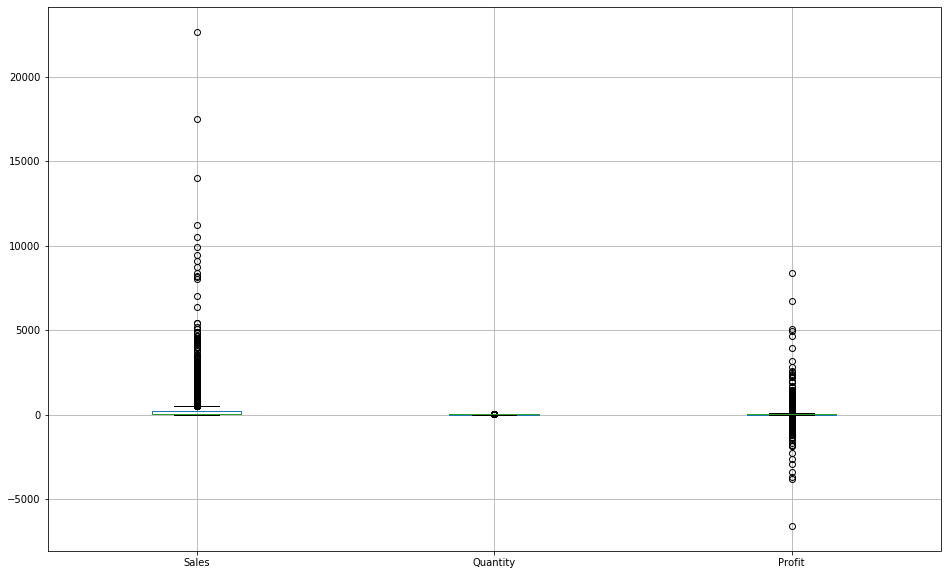

In [5]:
pd.plotting.boxplot(data_original, column=['Sales', 'Quantity', 'Profit'], figsize = (16,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002027F29B9C8>,
      dtype=object)

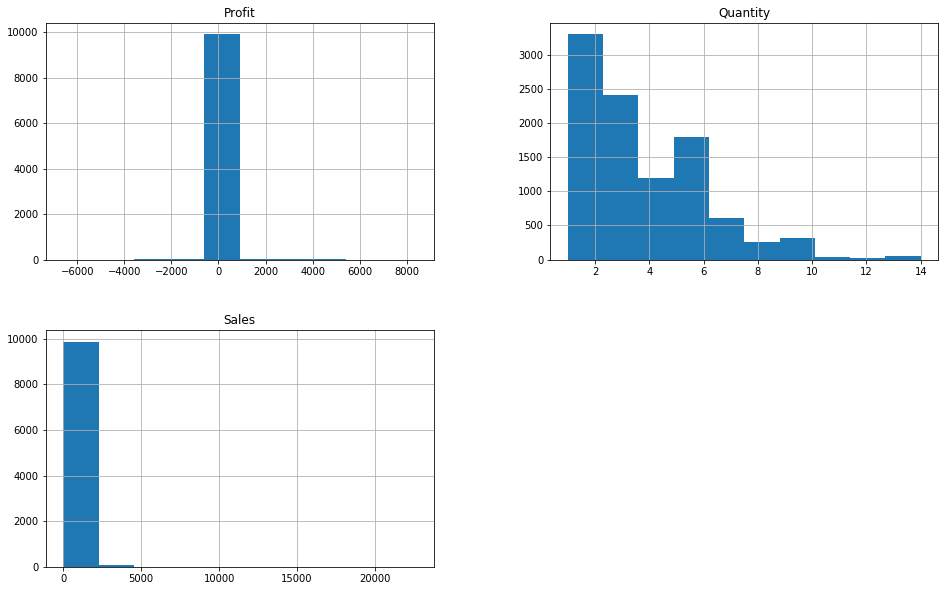

In [6]:
column_names = ['Sales', 'Quantity', 'Profit']
data_original[column_names].hist(figsize = (16,10))

**Outliers**

In [7]:
data_original[data_original.Sales > 10000]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808


In [8]:
data_original.drop([2623, 2697, 4190, 6826, 8153], inplace=True)

In [9]:
data_original[data_original.Profit < -2000]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
683,684,US-2017-168116,2017-11-04,2017-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
3011,3012,CA-2017-134845,2017-04-17,2017-04-23,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,...,80027,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
3151,3152,CA-2015-147830,2015-12-15,2015-12-18,First Class,NF-18385,Natalie Fritzler,Consumer,United States,Newark,...,43055,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912
4991,4992,US-2017-122714,2017-12-07,2017-12-13,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,...,60653,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
5310,5311,CA-2017-131254,2017-11-19,2017-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,...,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780
9774,9775,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,78207,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928


In [10]:
data_original.drop([683, 3011, 3151, 4991, 5310, 7772, 9774], inplace=True)

In [11]:
data_original[2622:2624]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2624,2625,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-PH-10001494,Technology,Phones,Polycom CX600 IP Phone VoIP phone,2399.6,8,0.0,647.892
2625,2626,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,OFF-EN-10002500,Office Supplies,Envelopes,Globe Weis Peel & Seel First Class Envelopes,63.9,5,0.0,28.755


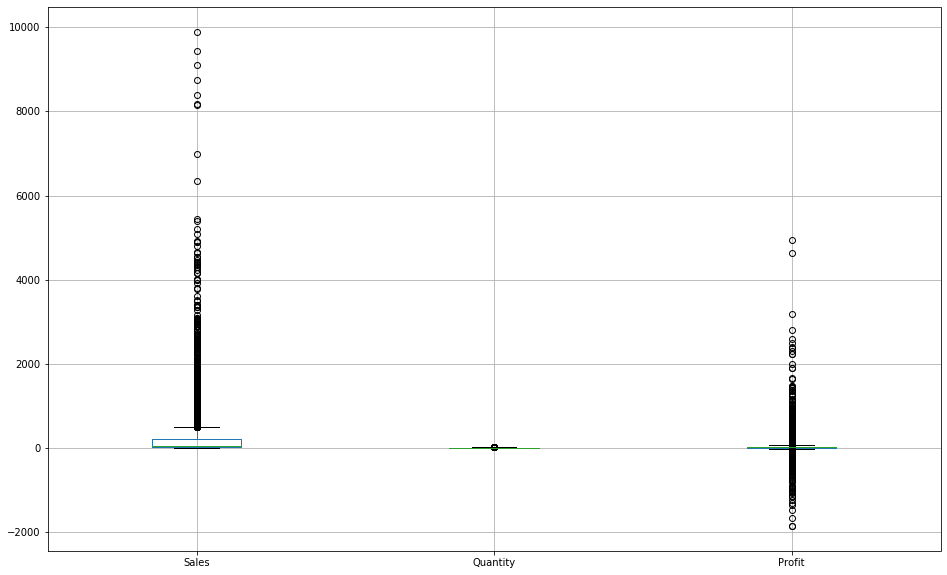

In [12]:
pd.plotting.boxplot(data_original, column=['Sales', 'Quantity', 'Profit'], figsize = (16,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020200036988>,
      dtype=object)

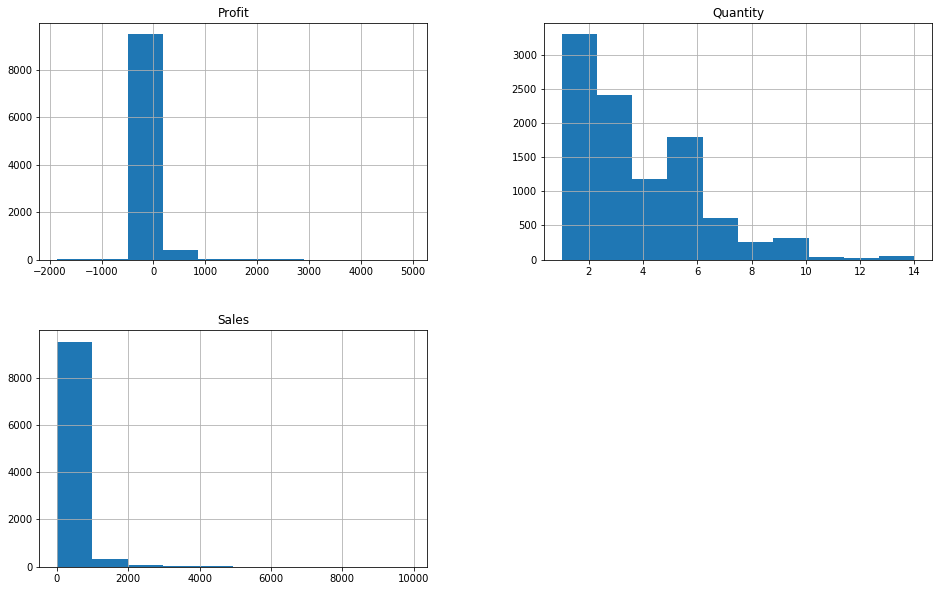

In [13]:
column_names = ['Sales', 'Quantity', 'Profit']
data_original[column_names].hist(figsize = (16,10))

In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
#X = data_original['Sales', 'Quantity', 'Profit']
column_names_to_normalize = ['Sales', 'Quantity', 'Profit']
X = data_original[column_names_to_normalize].values
x_scaled = scaler.fit_transform(X)
data_original_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = data_original.index)
data_original[column_names_to_normalize] = data_original_temp

#normalized_data = preprocessing.normalize(data_original)

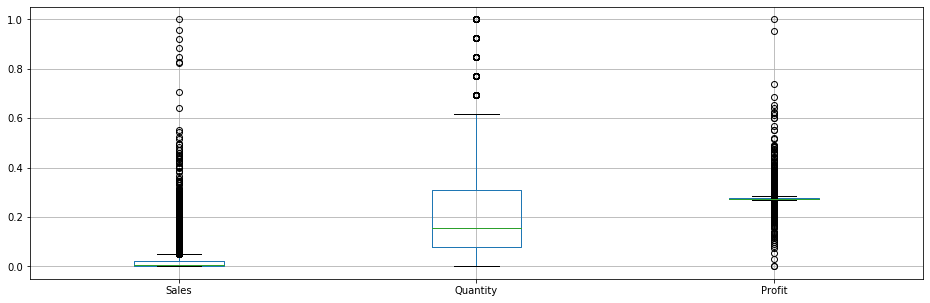

In [15]:
pd.plotting.boxplot(data_original[column_names_to_normalize], figsize = (16,5))

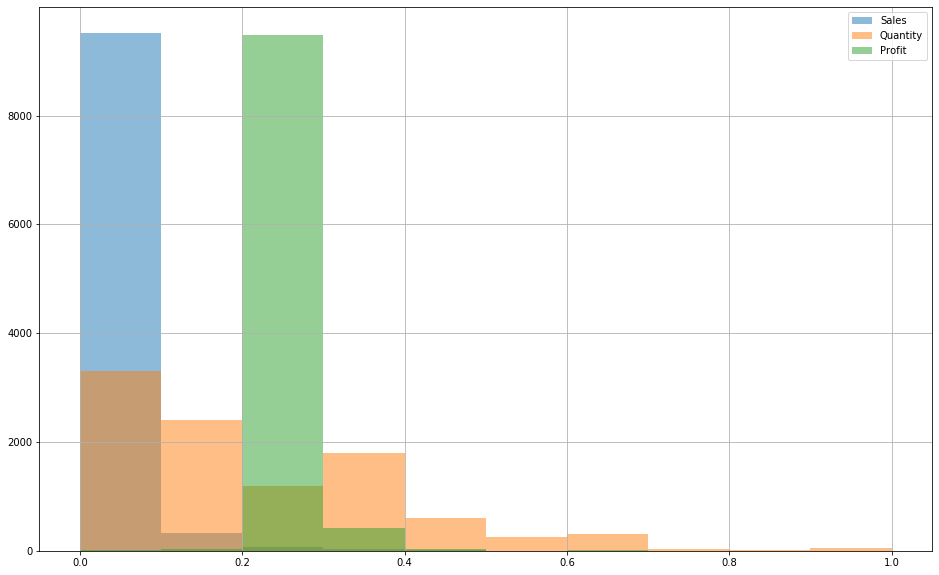

In [16]:
data_original['Sales'].hist(figsize =(16,10), alpha = 0.5, label= 'Sales')
data_original['Quantity'].hist(figsize =(16,10), alpha = 0.5, label= 'Quantity')
data_original['Profit'].hist(figsize =(16,10), alpha = 0.5, label= 'Profit')
plt.legend()

**We have to clean this data in order to see these boxes and histograms clearer**

Let's see how many of these columns have non-null values or missing values

In [33]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

To check if there are any missing values in the entire data set

In [34]:
data_original.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Which of the columns are not important? Can we remove some? Can we  add other features?**

In [35]:
data_original['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [36]:
data_original['Order Date in Year'] = data_original['Order Date'].dt.strftime('%Y')
data_original['Order Date in Year']

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Order Date in Year, Length: 9994, dtype: object

In [37]:
Year = np.unique(pd.Series(data_original['Order Date in Year']))
Year

array(['2014', '2015', '2016', '2017'], dtype=object)

In [38]:
data_original['Sales per unit'] = data_original['Sales'] / data_original['Quantity']

In [39]:
#Column_to_drop = ['Row ID', 'Ship Date', 'Customer ID', 'Country', 'Postal Code', 'Region', 'Product ID', 'Discount']
#Columns = ['Order ID', 'Order Date in Year', 'Order Date', 'Ship Mode', 'State', 'City', 'Segment', 'Customer Name', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Sales per unit','Sales', 'Profit']
data_truncated = (
    data_original
    .drop(columns= ['Row ID', 'Ship Date', 'Customer ID', 'Country', 'Postal Code', 'Region', 'Product ID', 'Discount'])
    [['Order ID', 'Order Date in Year', 'Order Date', 'Ship Mode', 'State', 'City', 'Segment', 'Customer Name', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Sales per unit','Sales', 'Profit']]
)
data_truncated.head(3)

,Order ID,Order Date in Year,Order Date,Ship Mode,State,City,Segment,Customer Name,Category,Sub-Category,Product Name,Quantity,Sales per unit,Sales,Profit
0,CA-2016-152156,2016,2016-11-08,Second Class,Kentucky,Henderson,Consumer,Claire Gute,Furniture,Bookcases,Bush Somerset Collection Bookcase,2,130.98,261.96,41.9136
1,CA-2016-152156,2016,2016-11-08,Second Class,Kentucky,Henderson,Consumer,Claire Gute,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,243.98,731.94,219.5820
2,CA-2016-138688,2016,2016-06-12,Second Class,California,Los Angeles,Corporate,Darrin Van Huff,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2,7.31,14.62,6.8714


### Data Visualization

In [40]:
data_truncated.State.value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

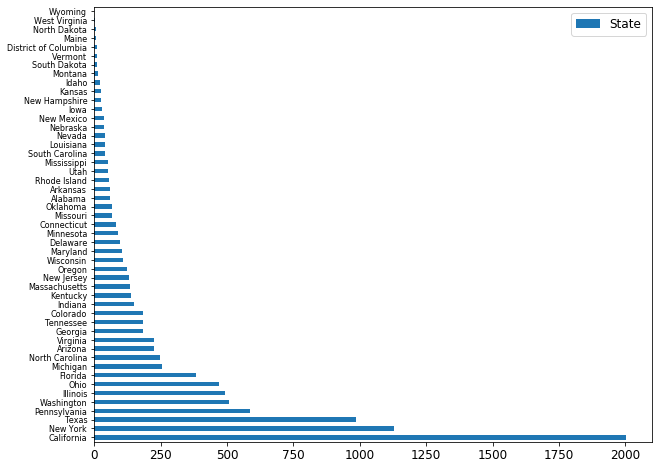

In [41]:
data_truncated.State.value_counts().plot.barh(figsize = (10,8),label = 'State')
plt.xticks(fontsize=12)
plt.yticks(fontsize=8)
plt.legend(fontsize=12)

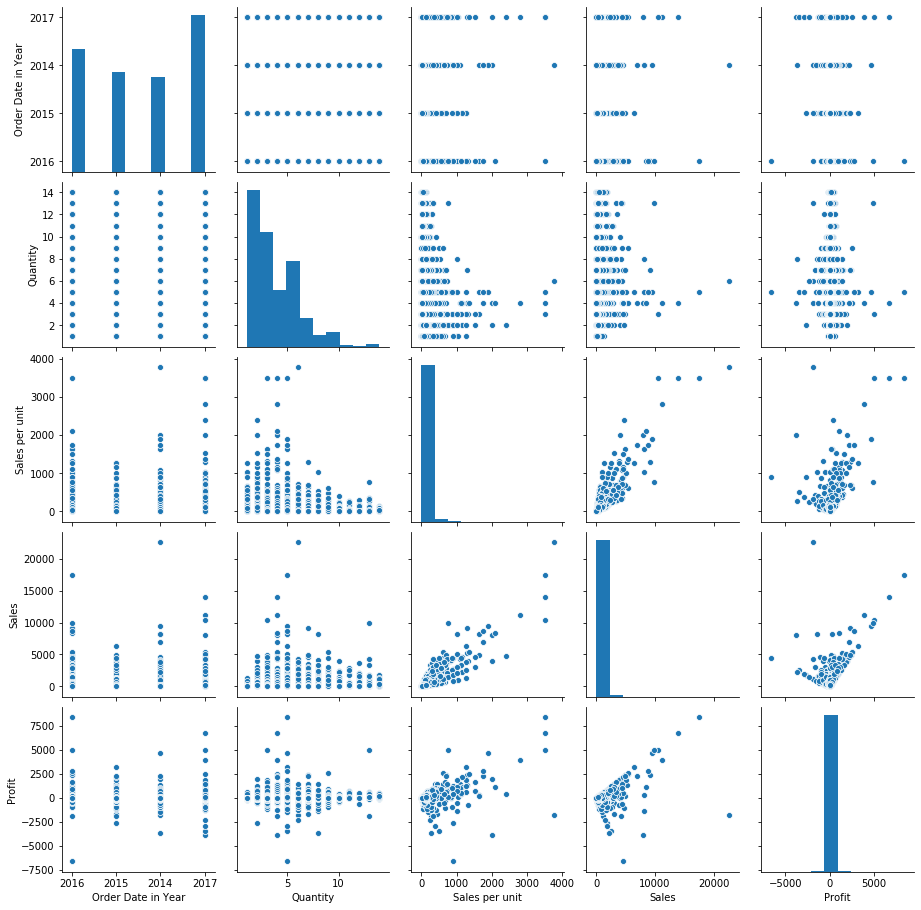

In [42]:
import seaborn as sns
sns.pairplot(data_truncated, );

In [43]:
grp = data_truncated.groupby('Product Name')
x = grp['Quantity'].agg(np.sum)
y = grp['Sales'].agg(np.sum)
z = grp['Profit'].agg(np.sum)
print(x, '\n')
print(y, '\n')
print(z, '\n')

Product Name
"While you Were Out" Message Book, One Form per Page                                                    8
#10 Gummed Flap White Envelopes, 100/Box                                                               11
#10 Self-Seal White Envelopes                                                                          10
#10 White Business Envelopes,4 1/8 x 9 1/2                                                             32
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                37
                                                                                                       ..
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4    24
iOttie HLCRIO102 Car Mount                                                                             12
iOttie XL Car Mount                                                                                    14
invisibleSHIELD by ZAGG Smudge-Fr

In [44]:
y.max()

61599.824

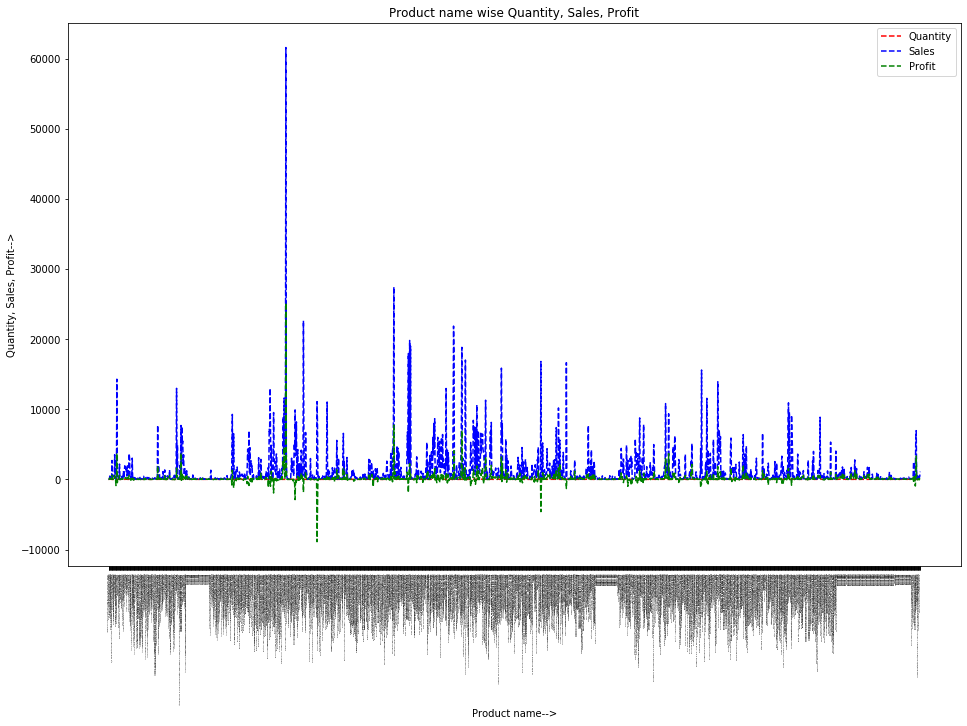

In [45]:
plt.figure(figsize=(16,10))
plt.plot(x,'r--', color='r', label= 'Quantity')
plt.plot(y,'r--', color='b', label= 'Sales')
plt.plot(z,'r--', color='g', label= 'Profit')
plt.xticks(rotation=90, fontsize=2)
plt.title('Product name wise Quantity, Sales, Profit')
plt.xlabel('Product name-->')
plt.ylabel('Quantity, Sales, Profit-->')
plt.legend()
plt.show()

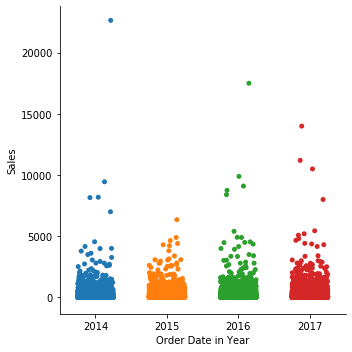

In [46]:
sns.catplot(x='Order Date in Year', y='Sales',
            data=data_truncated,jitter='0.25')

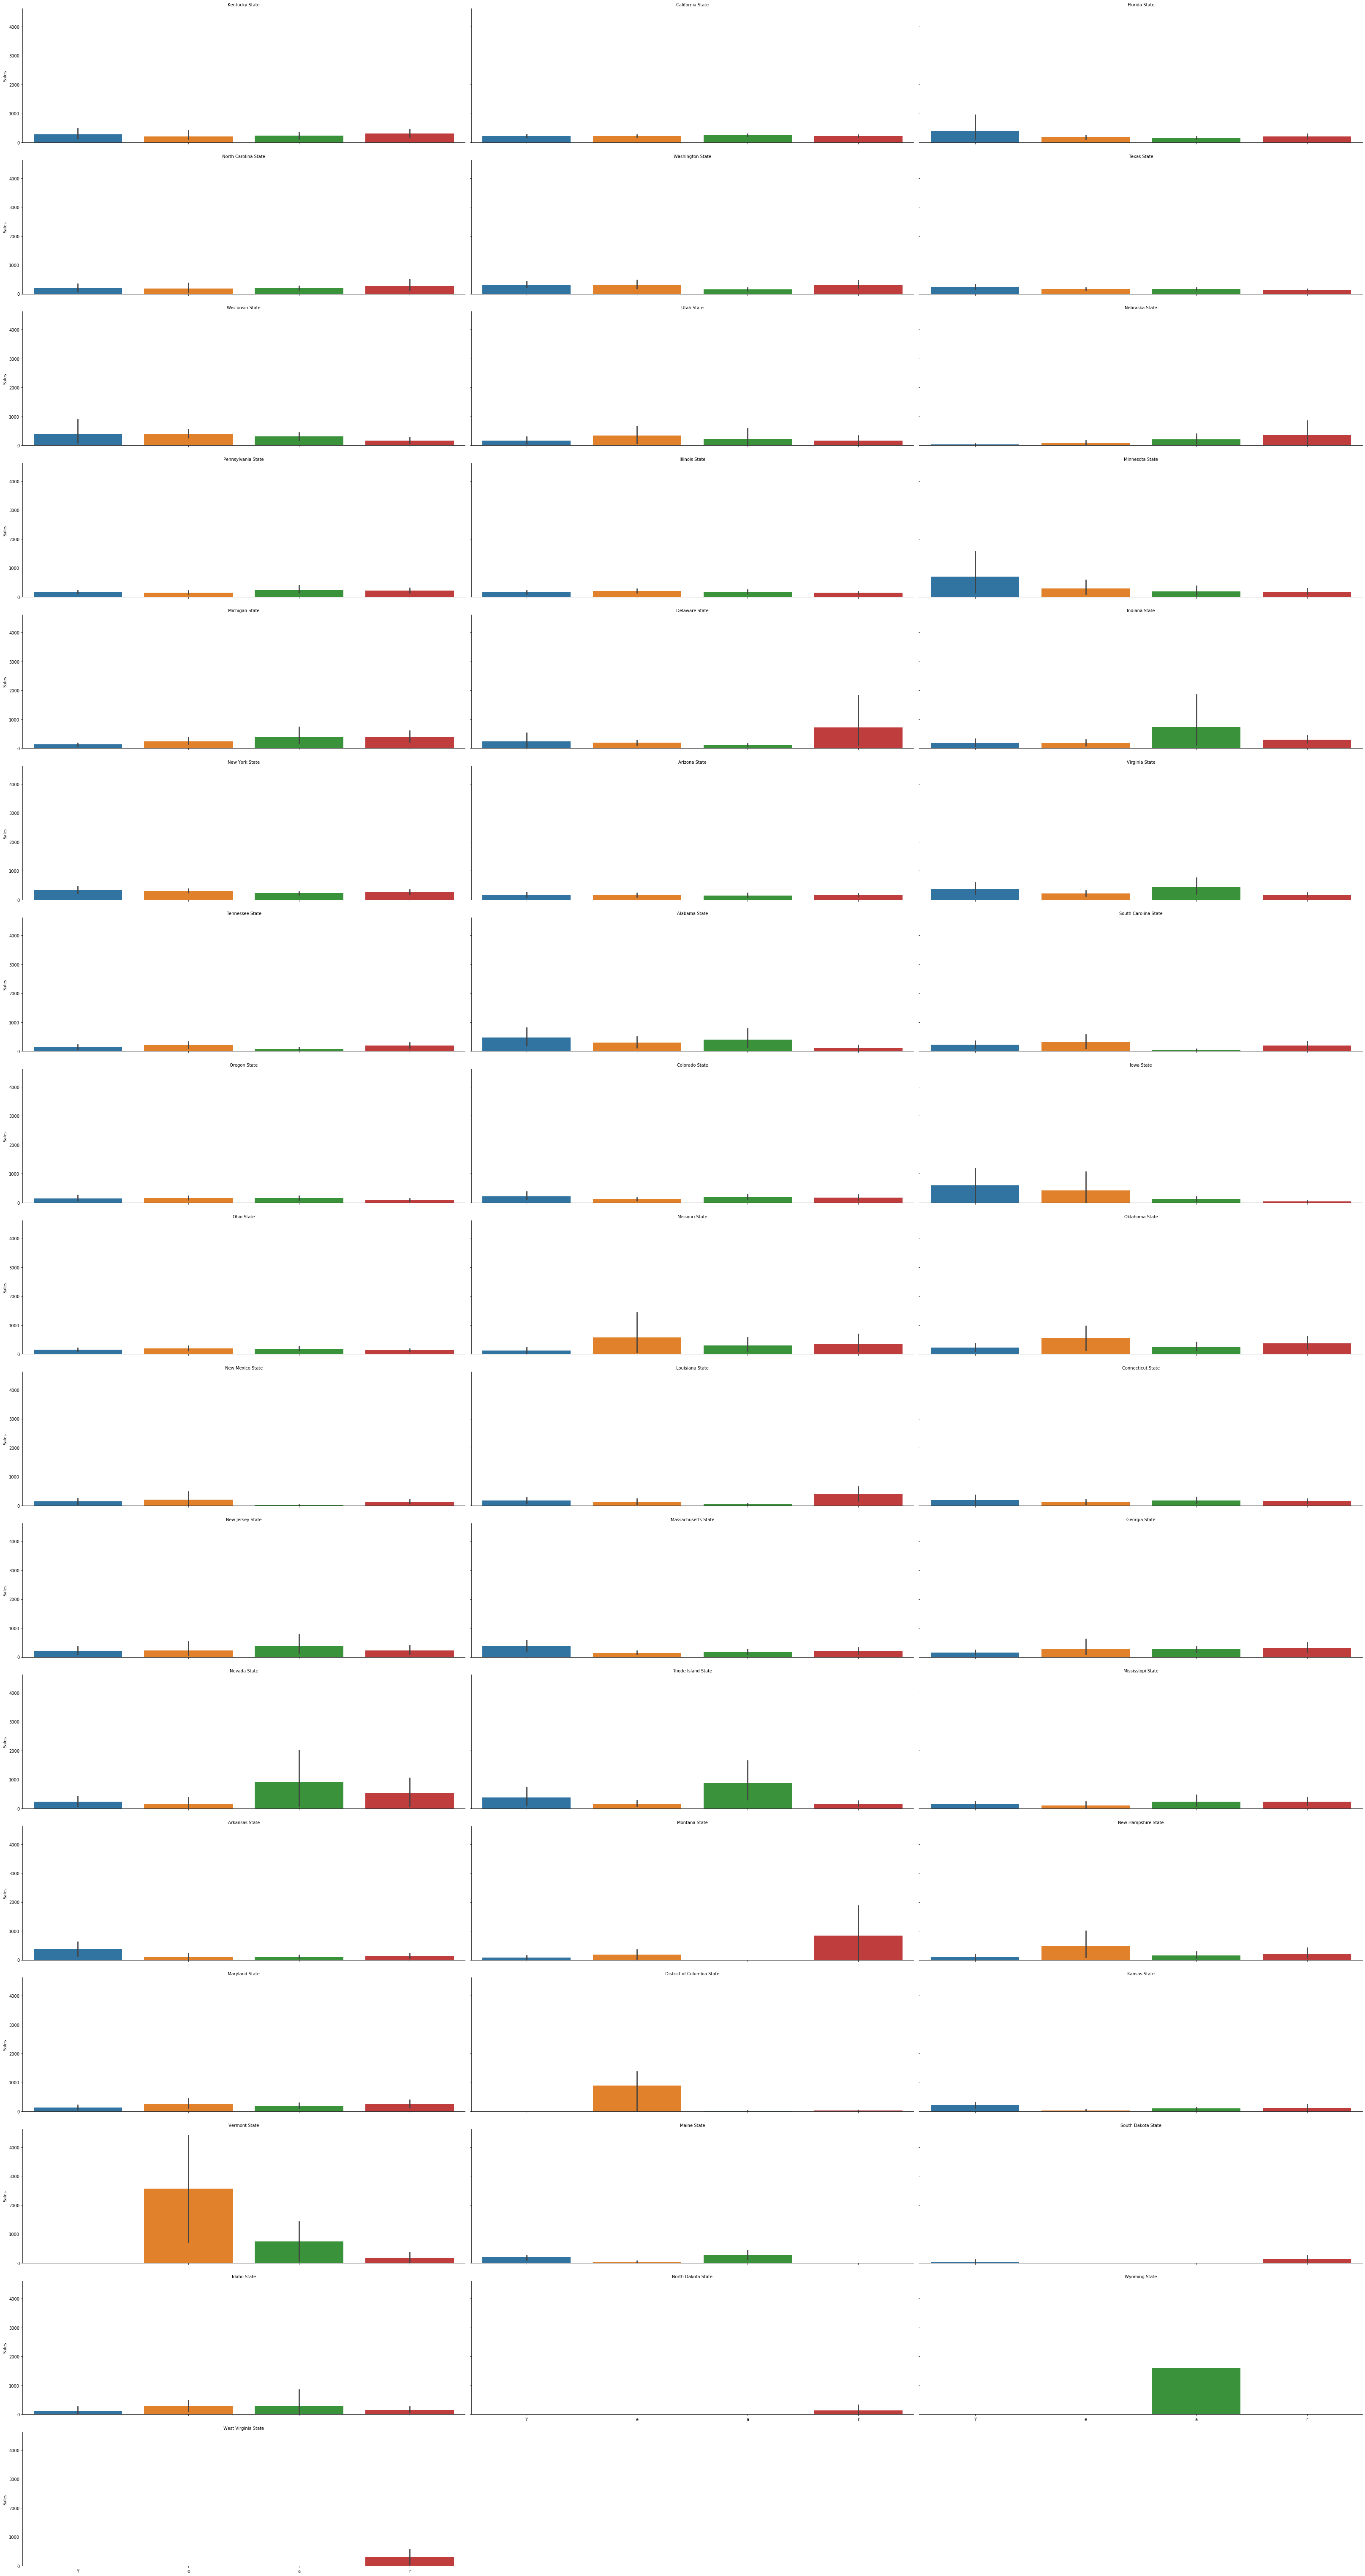

In [47]:
g = sns.catplot(x= 'Order Date in Year', y='Sales', col= 'State', col_wrap=3, data=data_truncated, kind="bar", height=5, aspect=3 )
(g.set_axis_labels("", 'Sales')
 .set_xticklabels('Year')
 .set_titles("{col_name} {col_var}"))

### Questions about data

**Which state had sold the most products?**

In [48]:
State_with_quantity = data_truncated.groupby(['State']).sum().sort_values('Quantity', ascending=False)
State_with_the_most_quantity = State_with_quantity.head(5)
State_with_the_most_quantity

,Quantity,Sales per unit,Sales,Profit
State,,,,
California,7667,121865.0490,457687.6315,76381.3871
New York,4224,83634.2160,310876.2710,74038.5486
Texas,3724,43949.3296,170188.0458,-25729.3563
Pennsylvania,2153,29508.5930,116511.9140,-15559.9603
Washington,1883,36752.9120,138641.2700,33402.6517


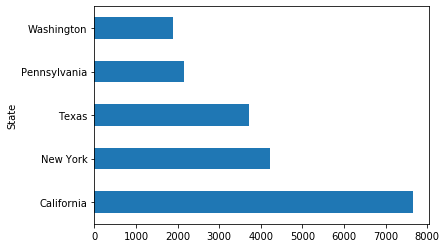

In [51]:
State_with_the_most_quantity['Quantity'].plot.barh()

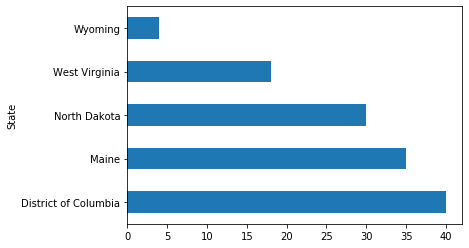

In [53]:
State_with_the_least_quantity = State_with_quantity.tail(5)
State_with_the_least_quantity['Quantity'].plot.barh()

**In California were sold the most units, but did it keep the highest amount in sales?**

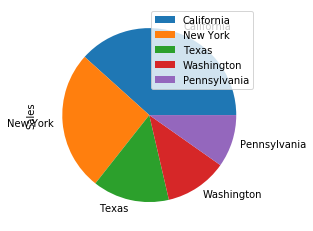

In [56]:
State_with_sales = data_truncated.groupby('State').sum().sort_values('Sales', ascending=False)
State_with_the_most_sales = State_with_sales.head(5)
State_with_the_most_sales.plot.pie(y="Sales")

In [57]:
State_with_the_least_sales = State_with_sales.tail(5)
State_with_the_least_sales

,Quantity,Sales per unit,Sales,Profit
State,,,,
Wyoming,4,400.784,1603.136,100.1960
South Dakota,42,514.610,1315.560,394.8283
Maine,35,353.070,1270.530,454.4862
West Virginia,18,300.028,1209.824,185.9216
North Dakota,30,238.930,919.910,230.1497


**Which state had the highest profit?**

In [58]:
State_with_profit = data_truncated.groupby(['State']).sum().sort_values('Profit', ascending=False)
State_with_highest_profit = State_with_profit.head(5)
State_with_highest_profit

,Quantity,Sales per unit,Sales,Profit
State,,,,
California,7667,121865.049,457687.6315,76381.3871
New York,4224,83634.216,310876.2710,74038.5486
Washington,1883,36752.912,138641.2700,33402.6517
Michigan,946,21080.725,76269.6140,24463.1876
Virginia,893,17378.740,70636.7200,18597.9504


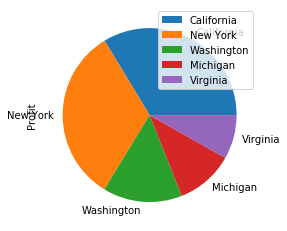

In [59]:
State_with_highest_profit.plot.pie(y = 'Profit')

In [60]:
State_with_lowest_profit = State_with_profit.tail(5)
State_with_lowest_profit

,Quantity,Sales per unit,Sales,Profit
State,,,,
North Carolina,983,14659.8460,55603.1640,-7490.9122
Illinois,1845,22610.0560,80166.1010,-12607.8870
Pennsylvania,2153,29508.5930,116511.9140,-15559.9603
Ohio,1759,22673.8390,78258.1360,-16971.3766
Texas,3724,43949.3296,170188.0458,-25729.3563


**Which customer had bought the most?**

In [64]:
Customer_quantity = data_truncated.groupby(['Customer Name']).sum().sort_values('Quantity', ascending=False)
Customer_with_the_most_quantity = Customer_quantity.head(5)
Customer_with_the_most_quantity

,Quantity,Sales per unit,Sales,Profit
Customer Name,,,,
Jonathan Doherty,150,1577.690,7610.864,1050.2668
William Brown,146,1392.168,6160.102,714.3311
John Lee,143,2833.796,9799.923,228.9070
Paul Prost,138,1651.596,7252.608,1495.0854
Steven Cartwright,133,1010.978,5226.210,1276.6513


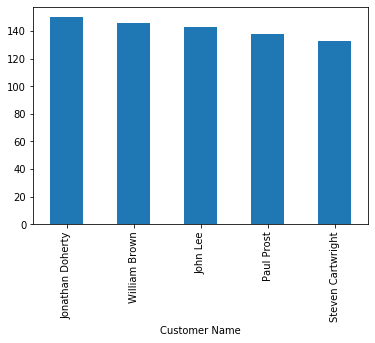

In [65]:
Customer_with_the_most_quantity['Quantity'].plot.bar()

In [66]:
Customer_with_the_least_quantity = Customer_quantity.tail(5)
Customer_with_the_least_quantity

,Quantity,Sales per unit,Sales,Profit
Customer Name,,,,
Thais Sissman,4,2.961,4.833,-3.3156
Roland Murray,4,50.370,98.350,28.6879
Lela Donovan,3,1.768,5.304,0.4641
Jocasta Rupert,3,287.960,863.880,107.9850
Anthony O'Donnell,2,80.640,161.280,12.0960


In [67]:
Customer_sales = data_truncated.groupby(['Customer Name']).sum().sort_values('Sales', ascending=False)
Customer_with_the_most_sales = Customer_sales.head(5)
Customer_with_the_most_sales

,Quantity,Sales per unit,Sales,Profit
Customer Name,,,,
Sean Miller,50,4355.421,25043.050,-1980.7393
Tamara Chand,42,4073.316,19052.218,8981.3239
Raymond Buch,71,3778.635,15117.339,6976.0959
Tom Ashbrook,36,3526.658,14595.620,4703.7883
Adrian Barton,73,2355.944,14473.571,5444.8055
Ken Lonsdale,113,3251.796,14175.229,806.8550
Sanjit Chand,87,3660.394,14142.334,5757.4119
Hunter Lopez,50,4051.954,12873.298,5622.4292
Sanjit Engle,78,3059.686,12209.438,2650.6769


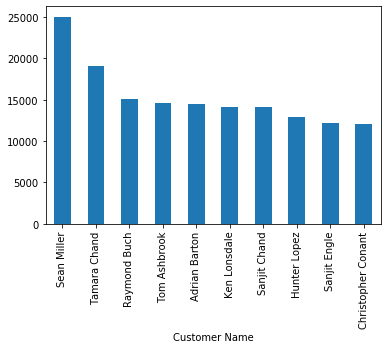

In [68]:
Customer_with_the_most_sales['Sales'].plot.bar()

In [69]:
Customer_with_the_least_sales = Customer_sales.tail(5)
Customer_with_the_least_sales

,Quantity,Sales per unit,Sales,Profit
Customer Name,,,,
Roy Skaria,10,10.688,22.328,9.5838
Mitch Gastineau,8,3.937,16.739,-1.2453
Carl Jackson,5,3.304,16.520,1.6520
Lela Donovan,3,1.768,5.304,0.4641
Thais Sissman,4,2.961,4.833,-3.3156


In [70]:
Customer_profit = data_truncated.groupby(['Customer Name']).sum().sort_values('Profit', ascending=False)
Customer_with_the_most_profit = Customer_profit.head(5)
Customer_with_the_most_profit

,Quantity,Sales per unit,Sales,Profit
Customer Name,,,,
Tamara Chand,42,4073.316,19052.218,8981.3239
Raymond Buch,71,3778.635,15117.339,6976.0959
Sanjit Chand,87,3660.394,14142.334,5757.4119
Hunter Lopez,50,4051.954,12873.298,5622.4292
Adrian Barton,73,2355.944,14473.571,5444.8055


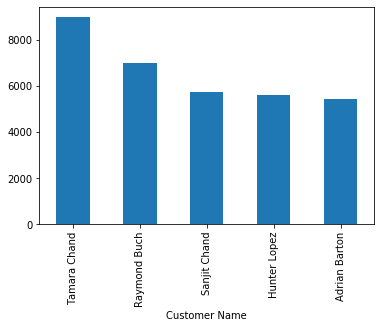

In [71]:
Customer_with_the_most_profit['Profit'].plot.bar()

In [72]:
Customer_with_the_lowest_profit = Customer_profit.tail(5)
Customer_with_the_lowest_profit

,Quantity,Sales per unit,Sales,Profit
Customer Name,,,,
Henry Goldwyn,68,711.064,3247.642,-2797.9635
Sharelle Roach,34,771.504,3233.481,-3333.9144
Luke Foster,69,654.945,3930.509,-3583.9770
Grant Thornton,26,2443.713,9351.212,-4108.6589
Cindy Stewart,40,1300.661,5690.055,-6626.3895


**Are  3 types of segments: Consumer, Corporate and Home Office**

**For which segment there was the most sales?**

In [73]:
Segment_quantity = data_truncated.groupby(['Segment']).sum().sort_values('Sales', ascending=False)
Segment_quantity

,Quantity,Sales per unit,Sales,Profit
Segment,,,,
Consumer,19521,309037.4617,1.161401e+06,134119.2092
Corporate,11608,185670.8678,7.061464e+05,91979.1340
Home Office,6744,114121.8436,4.296531e+05,60298.6785


In [74]:
print('The profit raport between Corporate and Consumer in %  is: ', Segment_quantity['Profit']['Corporate']/Segment_quantity['Profit']['Consumer']*100, '%')
print('The profit raport between Home Office and Consumer in %  is: ', Segment_quantity['Profit']['Home Office']/Segment_quantity['Profit']['Consumer']*100, '%')

The profit raport between Corporate and Consumer in %  is:  68.58013445549034 %
The profit raport between Home Office and Consumer in %  is:  44.959017324716065 %


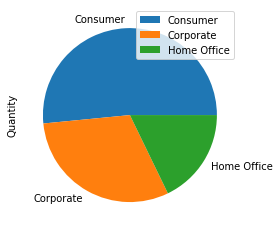

In [76]:
Segment_quantity.plot.pie(x = 'Segment', y = 'Quantity')

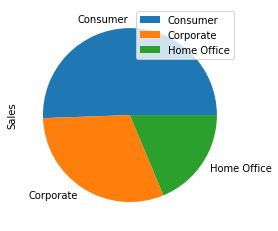

In [77]:
Segment_quantity.plot.pie(x = 'Segment', y = 'Sales')

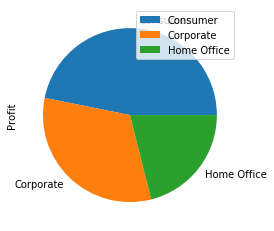

In [78]:
Segment_quantity.plot.pie(x = 'Segment', y = 'Profit')

**What item was sold the most?**

In [82]:
Product_quantity = data_truncated.groupby(['Product Name']).sum().sort_values('Quantity', ascending=False)
Product_with_the_highest_quantity = Product_quantity.head(5)
Product_with_the_highest_quantity

,Quantity,Sales per unit,Sales,Profit
Product Name,,,,
Staples,215,173.844,755.470,292.2046
Staple envelope,170,459.412,1686.812,751.6290
Easy-staple paper,150,857.020,2504.192,1096.0292
Staples in misc. colors,86,112.346,478.812,124.0516
KI Adjustable-Height Table,74,1182.225,4552.641,-248.4822


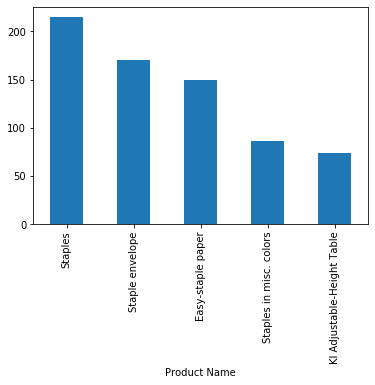

In [83]:
Product_with_the_highest_quantity['Quantity'].plot.bar()

In [84]:
Product_with_the_lowest_quantity = Product_quantity.tail(5)
Product_with_the_lowest_quantity

,Quantity,Sales per unit,Sales,Profit
Product Name,,,,
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,1,207.184,207.184,25.8980
Xerox 20,1,6.480,6.480,3.1104
Penpower WorldCard Pro Card Scanner,1,91.475,91.475,-1.8295
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1,119.833,119.833,-12.6882
Boston 1900 Electric Pencil Sharpener,1,14.980,14.980,4.4940


In [85]:
# Which product has the  highest amount in sales?
Product_sales = data_truncated.groupby(['Product Name']).sum().sort_values('Sales', ascending=False)
Product_sales

,Quantity,Sales per unit,Sales,Profit
Product Name,,,,
Canon imageCLASS 2200 Advanced Copier,20,15399.956,61599.824,2.519993e+04
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,31,9659.524,27453.384,7.753039e+03
Cisco TelePresence System EX90 Videoconferencing Unit,6,3773.080,22638.480,-1.811078e+03
HON 5400 Series Task Chairs for Big and Tall,39,4486.272,21870.576,3.979039e-13
GBC DocuBind TL300 Electric Binding System,37,6906.823,19823.479,2.233505e+03
...,...,...,...,...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,2,3.850,7.700,3.157000e+00
Grip Seal Envelopes,2,3.536,7.072,2.386800e+00
Xerox 20,1,6.480,6.480,3.110400e+00


In [86]:
Product_with_the_highest_sales = Product_sales.head(10)
Product_with_the_highest_sales

,Quantity,Sales per unit,Sales,Profit
Product Name,,,,
Canon imageCLASS 2200 Advanced Copier,20,15399.956,61599.824,2.519993e+04
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,31,9659.524,27453.384,7.753039e+03
Cisco TelePresence System EX90 Videoconferencing Unit,6,3773.080,22638.480,-1.811078e+03
HON 5400 Series Task Chairs for Big and Tall,39,4486.272,21870.576,3.979039e-13
GBC DocuBind TL300 Electric Binding System,37,6906.823,19823.479,2.233505e+03
GBC Ibimaster 500 Manual ProClick Binding System,48,3272.214,19024.500,7.609800e+02
Hewlett Packard LaserJet 3310 Copier,38,3839.936,18839.686,6.983884e+03
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",12,4374.975,18374.895,4.094977e+03
GBC DocuBind P400 Electric Binding System,27,4491.267,17965.068,-1.878166e+03


In [87]:
Product_with_the_lowest_sales = Product_sales.tail(10)
Product_with_the_lowest_sales

,Quantity,Sales per unit,Sales,Profit
Product Name,,,,
Newell 308,5,3.360,8.400,2.1000
Stockwell Gold Paper Clips,5,3.312,8.096,3.4040
4009 Highlighters,6,1.340,8.040,2.7336
Xerox 1989,2,3.984,7.968,2.6892
"Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink",4,3.900,7.800,3.0420
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,2,3.850,7.700,3.1570
Grip Seal Envelopes,2,3.536,7.072,2.3868
Xerox 20,1,6.480,6.480,3.1104
Avery 5,2,2.880,5.760,2.8224


In [89]:
# For which product was the higher profit?
Product_profit = data_truncated.groupby(['Product Name']).sum().sort_values('Profit', ascending=False)
Product_with_the_highest_profit = Product_profit.head(5)
Product_with_the_highest_profit

,Quantity,Sales per unit,Sales,Profit
Product Name,,,,
Canon imageCLASS 2200 Advanced Copier,20,15399.956,61599.824,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,31,9659.524,27453.384,7753.0390
Hewlett Packard LaserJet 3310 Copier,38,3839.936,18839.686,6983.8836
Canon PC1060 Personal Laser Copier,19,2379.966,11619.834,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",12,4374.975,18374.895,4094.9766


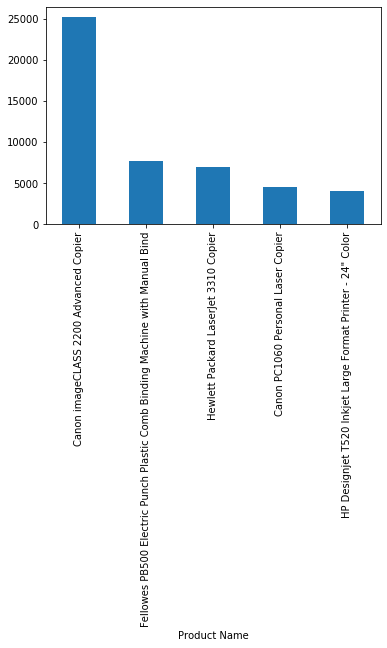

In [90]:
Product_with_the_highest_profit['Profit'].plot.bar()

In [91]:
Product_with_the_lowest_profit = Product_profit.tail(10)
Product_with_the_lowest_profit

,Quantity,Sales per unit,Sales,Profit
Product Name,,,,
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,15,339.0625,1706.250,-1148.4375
Balt Solid Wood Round Tables,19,1428.7680,6518.754,-1201.0581
Martin Yale Chadless Opener Electric Letter Opener,22,4497.1740,16656.200,-1299.1836
Cisco TelePresence System EX90 Videoconferencing Unit,6,3773.0800,22638.480,-1811.0784
GBC DocuBind P400 Electric Binding System,27,4491.2670,17965.068,-1878.1662
Bush Advantage Collection Racetrack Conference Table,33,1930.1555,9544.725,-1934.3976
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,27,1983.5280,9917.640,-2876.1156
Cubify CubeX 3D Printer Triple Head Print,4,1999.9950,7999.980,-3839.9904
Lexmark MX611dhe Monochrome Laser Printer,18,4079.9760,16829.901,-4589.9730


In [93]:
# Which customer in which state bought the most?
# We can see who sold the most within each state.

group_1 = data_truncated.groupby(['State','Customer Name']).sum()
total_sales = group_1['Sales'].groupby(level=0, group_keys=False)
total_sales.nlargest(3)

State          Customer Name    
Alabama        Mark Cousins         3236.410
               Alan Schoenberger    2216.800
               Irene Maddox         1979.890
Arizona        John Murray          2200.328
               Tanja Norvell        1588.323
                                      ...   
West Virginia  Eugene Hildebrand     536.480
Wisconsin      Resi Pölking         2854.480
               Justin Ellison       2657.810
               Dana Kaydos          2531.880
Wyoming        Michelle Arnett      1603.136
Name: Sales, Length: 143, dtype: float64

## Market Basket Analysis

Doing a little cleanup

In [95]:
data_truncated['Product Name'] = data_truncated['Product Name'].str.strip()
data_truncated.dropna(axis=0, subset=['Order ID'], inplace=True)
data_truncated['Order ID'] = data_truncated['Order ID'].astype('str')

In [96]:
basket = (data_truncated[data_truncated['State'] =="California"]
          .groupby(['Order ID', 'Product Name'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order ID'))
basket.head()

Product Name,"""While you Were Out"" Message Book, One Form per Page",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",12 Colored Short Pencils,12-1/2 Diameter Round Wall Clock,14-7/8 x 11 Blue Bar Computer Printout Paper,2300 Heavy-Duty Transfer File Systems by Perma,"24 Capacity Maxi Data Binder Racks, Pearl",...,"XtraLife ClearVue Slant-D Ring Binder, White, 3""",XtraLife ClearVue Slant-D Ring Binders by Cardinal,Zebra GX420t Direct Thermal/Thermal Transfer Printer,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service
Order ID,,,,,,,,,,,,,,,,,,,,,
CA-2014-100090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA-2014-100860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA-2014-100867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA-2014-101462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA-2014-101931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
basket.shape

(1021, 1197)

In [98]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

Terms
* the support is the number of transactions that include items in the {A} and {B} parts of the rule as a percentage of the total number of transactions
*  the confidence of the rule is the ratio of the number of transactions that include all items in {B} as well as the number of transactions that include all items in {A} to the number of transactions that include all items in {A}.
* The Lift tells us how much better a rule is at predicting the result than just assuming the result in the first place. Greater lift values indicate stronger associations.

In [99]:
frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True)
#For min_support = 0.0001 ---> Unable to allocate 14.8 GiB for an array with shape (648384, 3, 1021) and data type int64
frequent_itemsets

,support,itemsets
0,0.001959,"(#10- 4 1/8"" x 9 1/2"" Recycled Envelopes)"
1,0.004897,"(#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes)"
2,0.001959,(3-ring staple pack)
3,0.001959,(3M Replacement Filter for Office Air Cleaner ...
4,0.003918,(4009 Highlighters by Sanford)
...,...,...
536,0.001959,(Zebra GX420t Direct Thermal/Thermal Transfer ...
537,0.001959,(iHome FM Clock Radio with Lightning Dock)
538,0.001959,(invisibleSHIELD by ZAGG Smudge-Free Screen Pr...
539,0.003918,(netTALK DUO VoIP Telephone Service)


In [100]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Microsoft Natural Ergonomic Keyboard 4000),(Boston 16765 Mini Stand Up Battery Pencil Sha...,0.002938,0.001959,0.001959,0.666667,340.333333,0.001953,2.994123
1,(Boston 16765 Mini Stand Up Battery Pencil Sha...,(Microsoft Natural Ergonomic Keyboard 4000),0.001959,0.002938,0.001959,1.000000,340.333333,0.001953,inf


In [102]:
basket = (data_truncated[data_truncated['State'] =="New York"]
          .groupby(['Order ID', 'Product Name'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order ID'))
basket.head()

Product Name,"#10 Gummed Flap White Envelopes, 100/Box","#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes","1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",3-ring staple pack,"3D Systems Cube Printer, 2nd Generation, Magenta",3M Organizer Strips,4009 Highlighters by Sanford,50 Colored Long Pencils,...,Xerox 228,Xerox 23,Xerox 232,Xerox 4200 Series MultiUse Premium Copy Paper (20Lb. and 84 Bright),Xiaomi Mi3,"XtraLife ClearVue Slant-D Ring Binder, White, 3""",Zebra ZM400 Thermal Label Printer,i.Sound Portable Power - 8000 mAh,iOttie HLCRIO102 Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector
Order ID,,,,,,,,,,,,,,,,,,,,,
CA-2014-100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA-2014-100328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA-2014-100391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA-2014-101364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA-2014-101476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
basket.shape

(562, 820)

In [104]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [106]:
frequent_itemsets_newyork = apriori(basket_sets, min_support=0.001, use_colnames=True)
#For min_support = 0.0001 ---> Unable to allocate 14.8 GiB for an array with shape (648384, 3, 1021) and data type int64
frequent_itemsets_newyork

,support,itemsets
0,0.003559,"(#10 Gummed Flap White Envelopes, 100/Box)"
1,0.001779,"(#10 White Business Envelopes,4 1/8 x 9 1/2)"
2,0.001779,"(#10- 4 1/8"" x 9 1/2"" Recycled Envelopes)"
3,0.001779,"(#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Env..."
4,0.003559,"(1.7 Cubic Foot Compact ""Cube"" Office Refriger..."
...,...,...
26172,0.001779,(Logitech Wireless Boombox Speaker - portable ...
26173,0.001779,(Logitech Wireless Boombox Speaker - portable ...
26174,0.001779,(Logitech Wireless Boombox Speaker - portable ...
26175,0.001779,(Logitech Wireless Boombox Speaker - portable ...


In [105]:
rules = association_rules(frequent_itemsets_newyork, metric="lift", min_threshold=1)
rules.head()

NameError: name 'frequent_itemsets_newyork' is not defined